In [1]:
from __future__ import division
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn.apionly as sns

from composition.analysis.load_sim import load_sim
from composition.support_functions.checkdir import checkdir
import composition.analysis.plotting_functions as plotting

# import composition as comp

%matplotlib inline

/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def make_charge_energy_histogram(log_energy, charge, proton_mask, iron_mask, ax, plot_line=False):
    charge_bins = np.linspace(0, 7, 50)
    energy_bins = np.linspace(6.2, 9.51, 50)
    energy_midpoints = (energy_bins[1:] + energy_bins[:-1]) / 2
    proton_hist, xedges, yedges = np.histogram2d(log_energy[MC_proton_mask],
                                                 charge[MC_proton_mask],
                                                 bins=[energy_bins,
                                                       charge_bins],
                                                 normed=False)
    proton_hist = np.ma.masked_where(proton_hist == 0, proton_hist)
    iron_hist, xedges, yedges = np.histogram2d(log_energy[MC_iron_mask],
                                               charge[MC_iron_mask],
                                               bins=[energy_bins, charge_bins],
                                               normed=False)

    h = proton_hist / (proton_hist + iron_hist)
    h = np.rot90(h)
    h = np.flipud(h)
    h = np.ma.masked_where(h == 0, h)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    def line_fit(array):
        fit = []
        for x in array:
            if x <= 9.0:
                slope = (5.3 - 2.55) / (9.5 - 6.2)
                fit.append(2.55 + slope * (x - 6.2))
            else:
                slope = (5.20 - 4.9) / (9.5 - 9.0)
                fit.append(4.9 + slope * (x - 9.0))
        fit = np.array(fit)
        return fit

    colormap = 'coolwarm'
    im = ax.imshow(h, extent=extent, origin='lower',
               interpolation='none', cmap=colormap,
               aspect=0.5, vmin=0, vmax=1)
    x = np.arange(6.2, 9.51, 0.1)
    if plot_line:
        ax.plot(x, line_fit(x), marker='None', linestyle='--',
                 color='k')
    return im


/home/jbourbeau/composition/analysis/load_sim.py:52: RuntimeWarning: divide by zero encountered in log10
  cut_dict['min_energy'] = (np.log10(df['reco_energy']) > 6.2)
/home/jbourbeau/composition/analysis/load_sim.py:56: RuntimeWarning: divide by zero encountered in log10
  df['reco_log_energy'] = np.nan_to_num(np.log10(df['reco_energy']))
/home/jbourbeau/composition/analysis/load_sim.py:57: RuntimeWarning: invalid value encountered in log10
  df['InIce_log_charge'] = np.nan_to_num(np.log10(df['InIce_charge_SRTCoincPulses']))


number of events = 155907
number of events = 159125
number of events = 186610


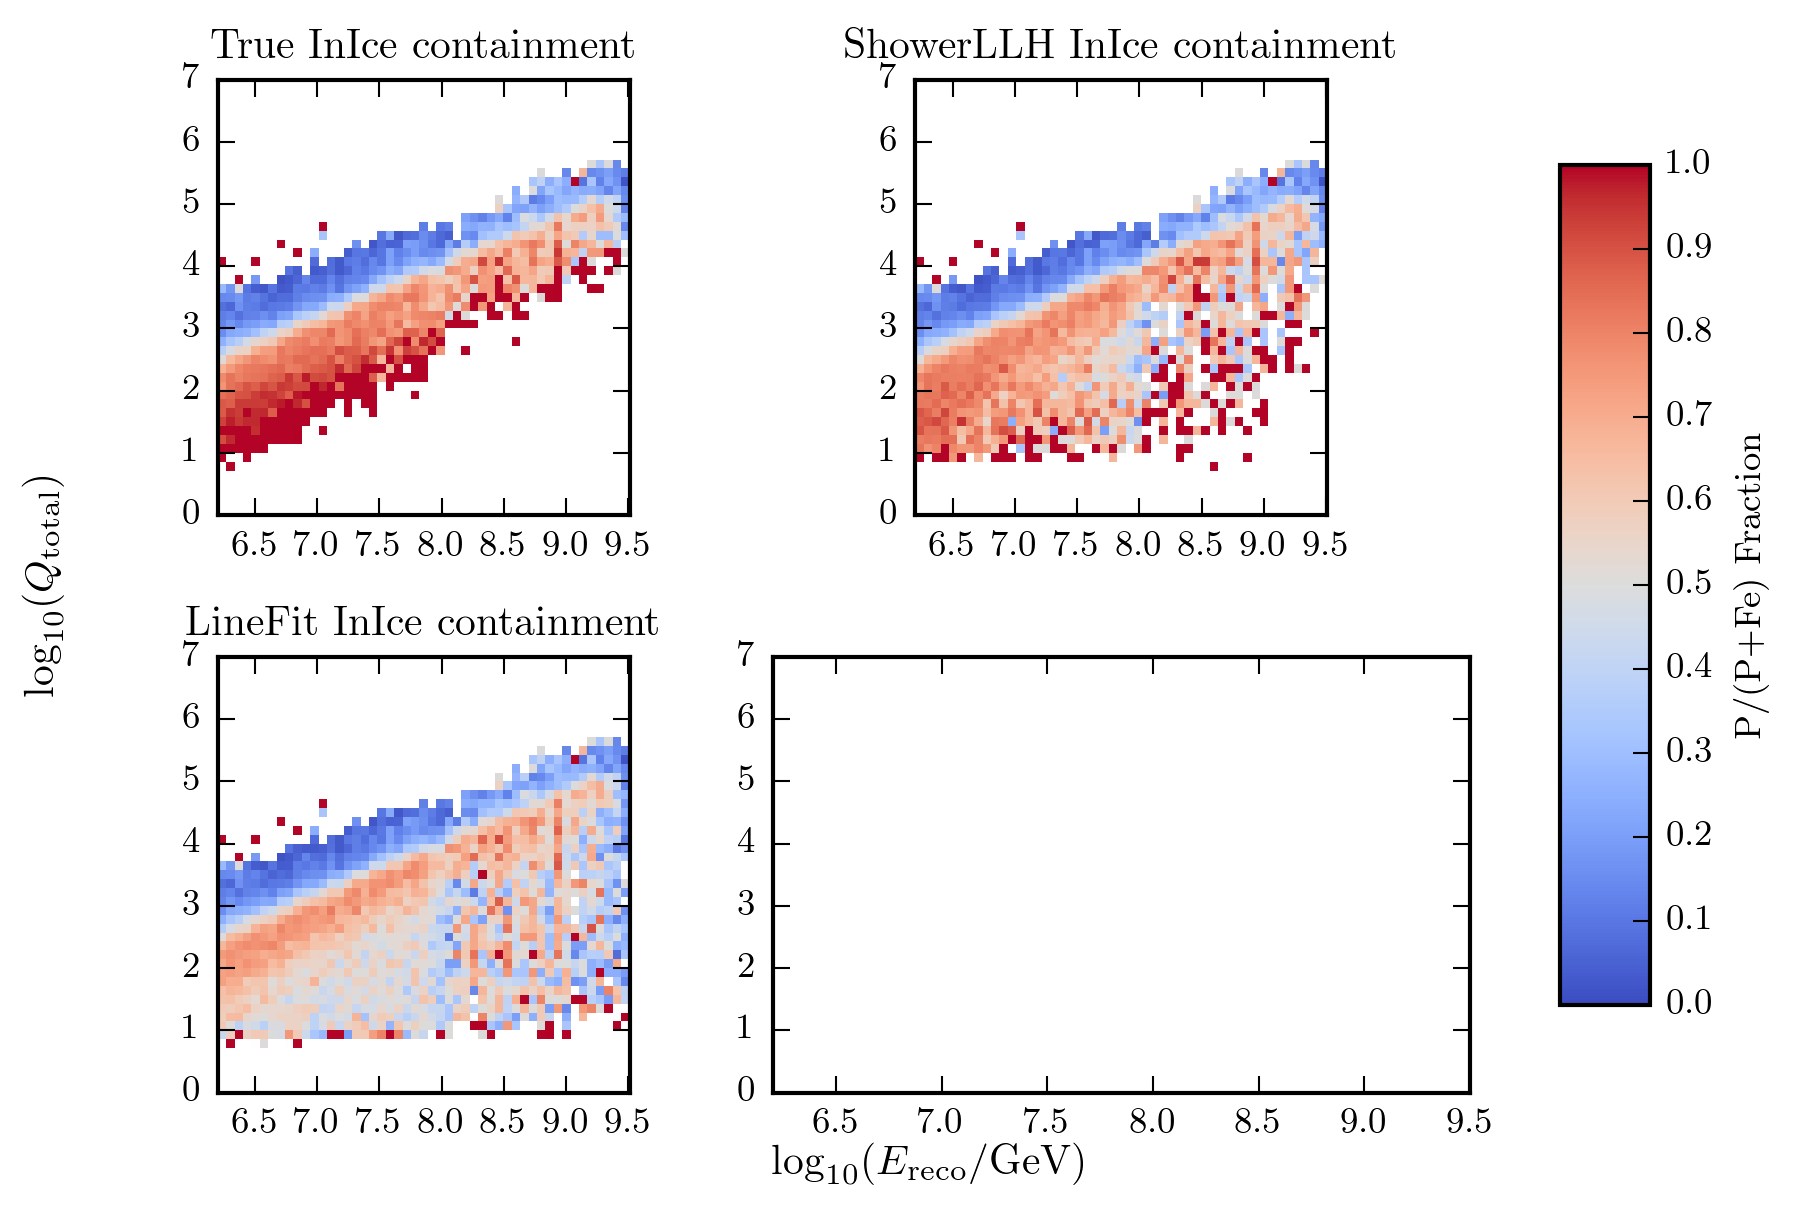

In [3]:
inice_containment = ['InIce_containment', 'reco_InIce_containment', 'LF_InIce_containment']
titles = ['True InIce containment', 'ShowerLLH InIce containment', 'LineFit InIce containment']
fig, axarr = plt.subplots(2, 2)
for containment, title, ax in zip(inice_containment, titles, axarr.flatten()[:-1]):
    # Import ShowerLLH sim reconstructions and cuts to be made
    df, cut_dict = load_sim(return_cut_dict=True)
    selection_mask = np.array([True] * len(df))
    standard_cut_keys = ['reco_exists', 'reco_zenith', 'min_hits', 'reco_IT_containment',
                         'IceTopMaxSignalInEdge', 'IceTopMaxSignal', containment]
    for key in standard_cut_keys:
        selection_mask *= cut_dict[key]

    df = df[selection_mask]
    print('number of events = {}'.format(len(df)))

    MC_proton_mask = (df.MC_comp == 'P')
    MC_iron_mask = (df.MC_comp == 'Fe')
    log_energy = df['reco_log_energy']
    charge = df.InIce_log_charge
    
    im = make_charge_energy_histogram(log_energy, charge, MC_proton_mask, MC_iron_mask, ax=ax)
    ax.set_title(title)
    plt.xlim([6.2, 9.5])
    plt.ylim([0, 7])
    
fig.text(0.5, 0.00, '$\log_{10}(E_{\mathrm{reco}}/\mathrm{GeV})$', ha='center')
fig.text(0.00, 0.5, '$\log_{10}(Q_{\mathrm{total}})$', va='center', rotation='vertical')
plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='P/(P+Fe) Fraction')


number of events = 116316


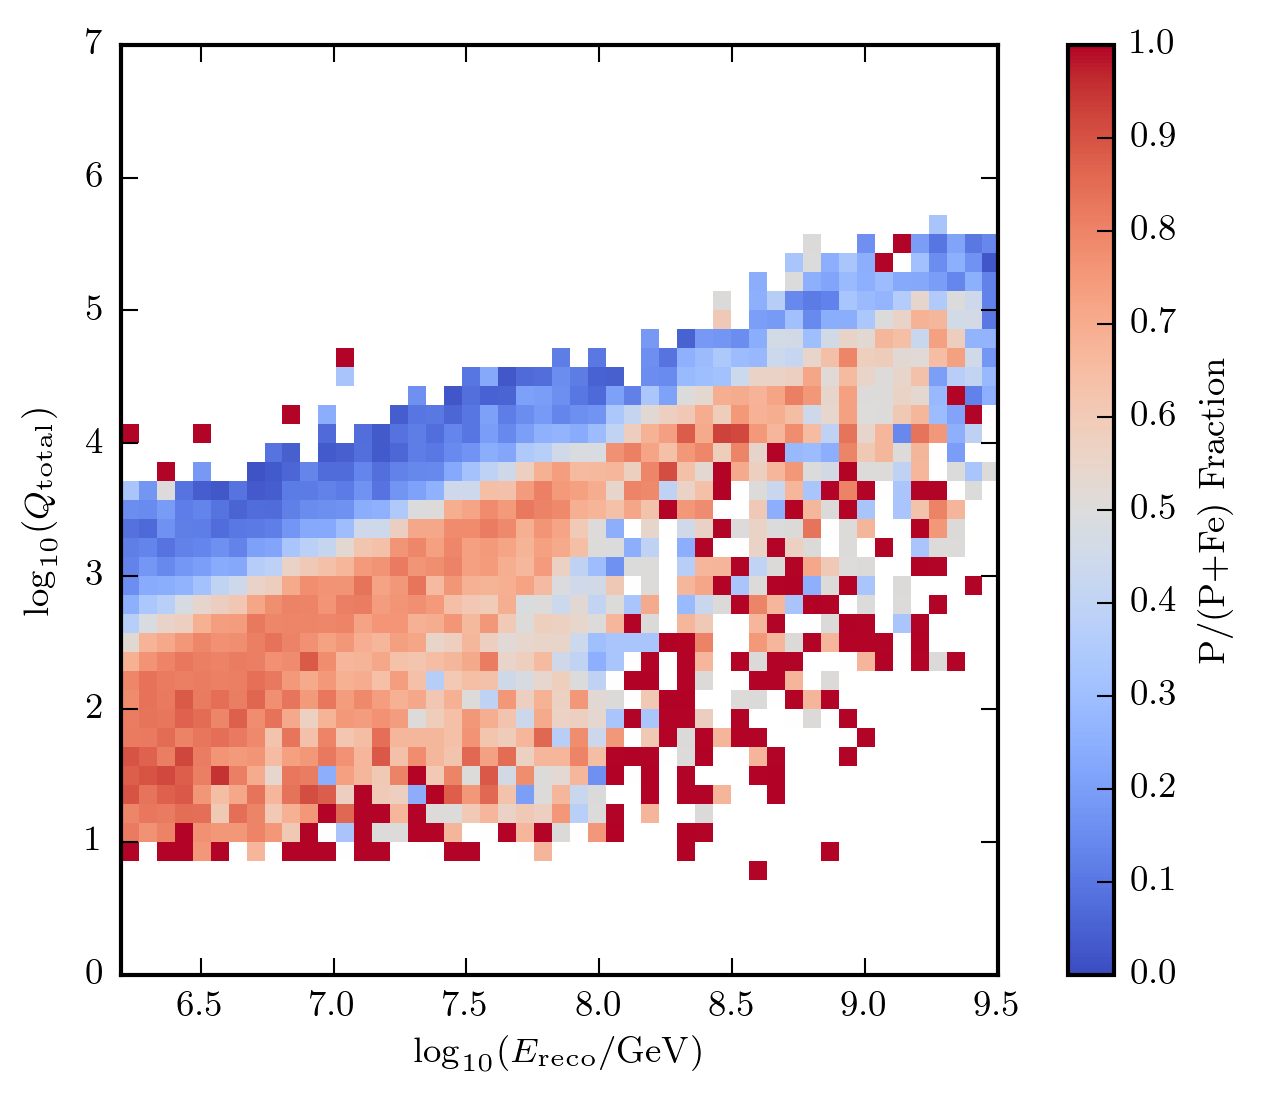

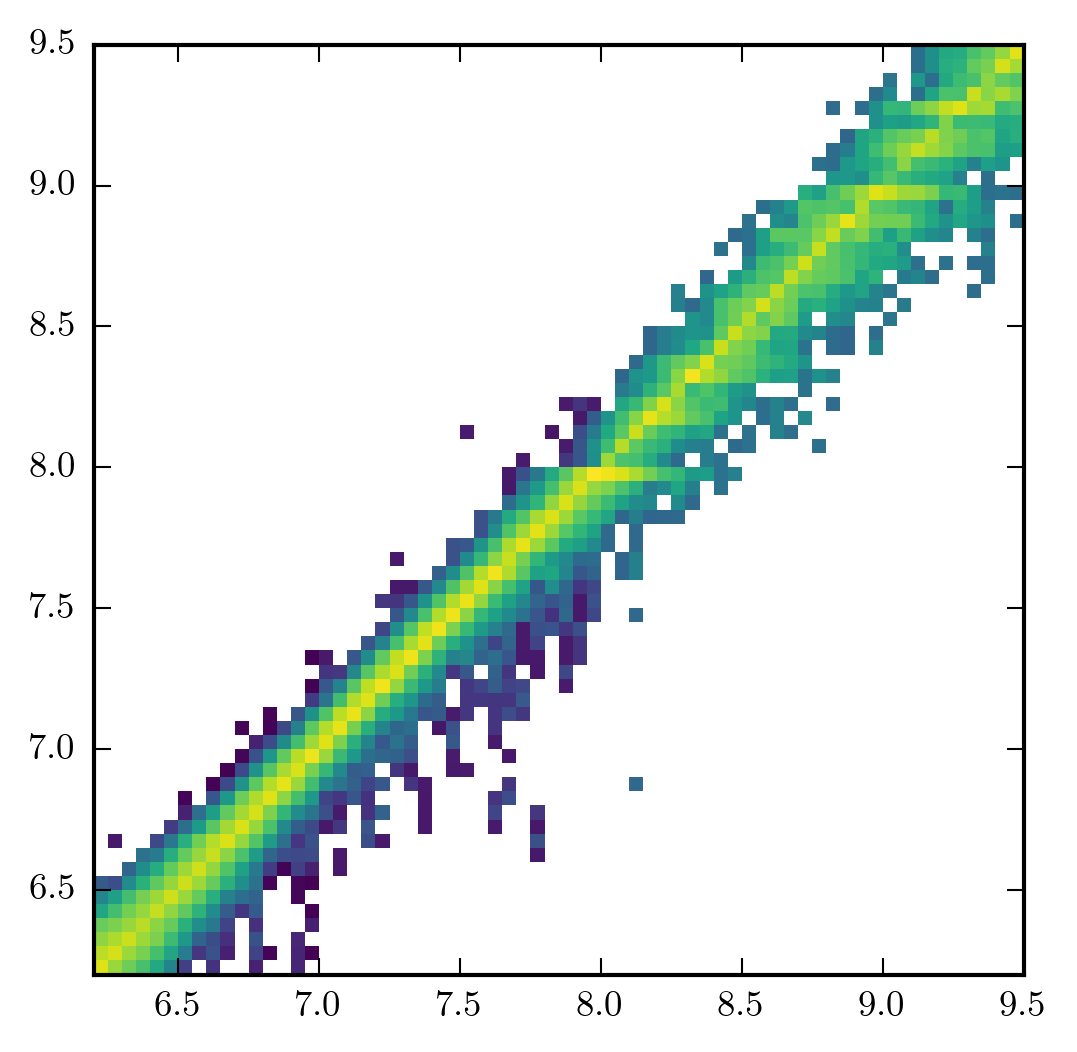

In [26]:
# Import ShowerLLH sim reconstructions and cuts to be made
df, cut_dict = load_sim(return_cut_dict=True)
selection_mask = np.array([True] * len(df))
standard_cut_keys = ['reco_exists', 'reco_zenith', 'min_hits', 'IceTopMaxSignalInEdge', 'IceTopMaxSignal', 'IceTopNeighbourMaxSignal',
                     'StationDensity', 'reco_containment', 'min_energy']
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]

df = df[selection_mask]
print('number of events = {}'.format(len(df)))

MC_proton_mask = (df.MC_comp == 'P')
MC_iron_mask = (df.MC_comp == 'Fe')
log_energy = df['reco_log_energy']
MC_log_energy = df['MC_log_energy']
charge = df.InIce_log_charge

fig, ax = plt.subplots()
im = make_charge_energy_histogram(log_energy, charge, MC_proton_mask, MC_iron_mask, ax=ax)
plt.xlim([6.2, 9.5])
plt.ylim([0, 7])
plt.xlabel('$\log_{10}(E_{\mathrm{reco}}/\mathrm{GeV})$')
plt.ylabel('$\log_{10}(Q_{\mathrm{total}})$')
cb = fig.colorbar(im, label='P/(P+Fe) Fraction')
plt.show()

fig, ax = plt.subplots()
energy_bins = np.arange(6.2, 9.51, 0.05)
# energy_bins = np.linspace(6.2, 9.51, 50)
im = plotting.histogram_2D(MC_log_energy, log_energy, energy_bins, log_counts=True, make_prob=True, ax=ax)
# ax.set_title(title)
# plt.xlim([6.2, 9.5])
plt.show()



NameError: name 'plotting_functions' is not defined

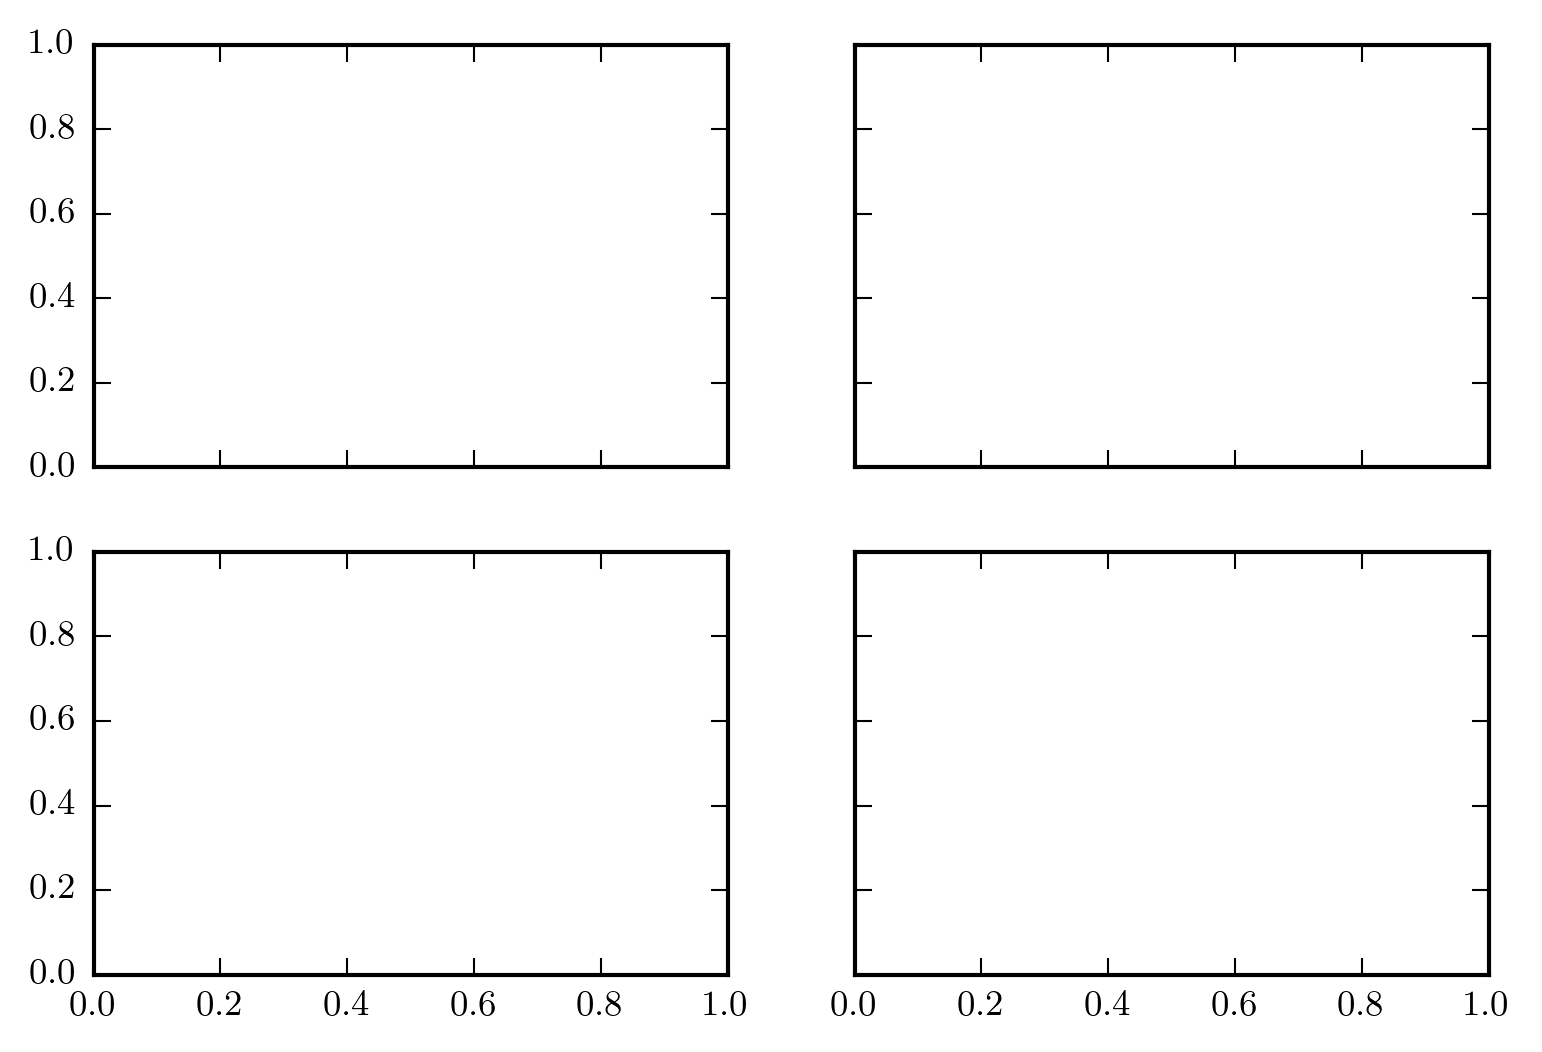

In [5]:
inice_containment = ['InIce_containment', 'reco_InIce_containment', 'LF_InIce_containment']
titles = ['True InIce containment', 'ShowerLLH InIce containment', 'LineFit InIce containment']
fig, axarr = plt.subplots(2, 2, sharex=True, sharey=True)
for containment, title, ax in zip(inice_containment, titles, axarr.flatten()[:-1]):
    # Import ShowerLLH sim reconstructions and cuts to be made
    df, cut_dict = load_sim(return_cut_dict=True)
    selection_mask = np.array([True] * len(df))
    standard_cut_keys = ['reco_exists', 'reco_zenith', 'min_hits', 'reco_IT_containment',
                         'IceTopMaxSignalInEdge', 'IceTopMaxSignal', containment]
    for key in standard_cut_keys:
        selection_mask *= cut_dict[key]

    df = df[selection_mask]

    MC_log_energy = df['MC_log_energy']
    reco_log_energy = df['reco_log_energy']
    energy_bins = np.linspace(6.2, 9.51, 75)
    
    im = plotting_functions.histogram_2D(MC_log_energy, reco_log_energy,
                                              energy_bins, log_counts=True,
                                              make_prob=True, ax=ax)
    ax.set_title(title)
    plt.xlim([6.2, 9.5])

plt.xlim([6.2, 9.5])
fig.text(0.5, 0.00, '$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV})$', ha='center')
fig.text(0.00, 0.5, '$\log_{10}(E_{\mathrm{reco}}/\mathrm{GeV})$', va='center', rotation='vertical')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='P/(P+Fe) Fraction')